# <center> Prediction of Red Wine Quality </center>
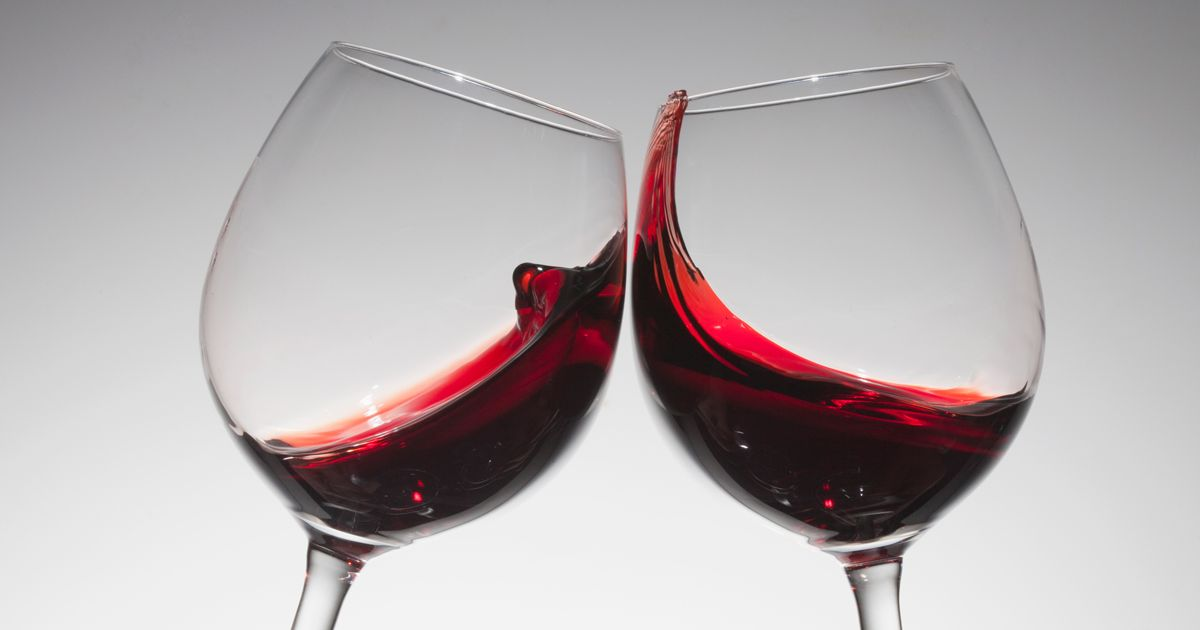

## <center> Context </center>
<br></br>
Wine is perhaps the oldest fermented product known to mankind, with its origin dating back to somewhere around $6000$ BC in Georgia.Once viewed as a luxury good, nowadays wine is increasingly enjoyed by a wider range of consumers. The top $5$ wine exporting countries as of $2019$ are as follows:
<br></br>

| Country Name | Net Worth (in Billions of US Dollars) | Percentage of Total Wine Exports|
| ------ | ------ | ------ |
| France | $11$ | $30.4$ % |
| Italy | $7.3$ | $20.3$ % |
| Spain | $3.1$ | $8.7$ % |
| Australia | $2.1$ | $5.8$ % |
| Chile | $1.9$ | $5.3$ % |

<br></br>
with more than $70.5$ % of the market share in $2019$. The worldwide Wine market has grown at above-average rates within the Alcoholic Drinks market and is expected to reach more than US Dollar $439$ Billion in terms of revenue by $2023$.[<cite>[1][1]</cite>]<br></br>
To support its growth, the wine industry is investing in new technologies for both wine making and selling processes. Wine certification and quality assessment are key elements within this context. Certification prevents the illegal adulteration of wines (to safeguard human health) and assures quality for the wine market. Quality evaluation is often part of the certification process and can be used to improve wine making (by identifying the most influential factors) and to stratify wines such as premium brands (useful for setting prices). Wine certification is generally assessed by physicochemical and sensory tests. Physicochemical laboratory tests routinely used to characterize wine include determination of density, alcohol or pH values, while Sensory tests rely mainly on human experts. It should be stressed that taste is the least understood of the human senses thus wine classification is a difficult task.[<cite>[2][2]</cite>]<br></br>

[1]: https://agriexchange.apeda.gov.in/Weekly_eReport/Wine_Report.pdf
[2]: https://www.sciencedirect.com/science/article/pii/S0167923609001377

## <center> Description of the Data </center>
<br></br>
This Dataset is enriched with the values obtained from the Physicochemical laboratory tests and the Sensory test. Here are the name of the variables:<br></br>

| # | Input variables (based on physicochemical tests) | Output variable (based on sensory data) |
| --- | --- | --- |
| 1. | fixed acidity | quality (score between 0 and 10) |
| 2. | volatile acidity |   | |   |
| 3. | citric acid |   |
| 4. | residual sugar |   |
| 5. | chlorides |   |
| 6. | free sulfur dioxide |   |
| 7. | total sulfur dioxide |   |
| 8. | density |   |
| 9. | pH |   |
| 10. | sulphates |   |
| 11. | alcohol |   |

<br></br>  



In [ ]:
# Importing Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 1500)

from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, auc
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')

### An Overview of Data

First 10 Records

In [ ]:
df = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head(10)

Name of the Columns

In [ ]:
cols = df.columns
print(f'Name of the Columns in the Dataset are : \n\n {np.array(cols)}')

Basic Informations

In [ ]:
df.info()

### Observations from the Data

- The dataset has $1599$ number of records.
- There is __no Null Values (Missing Values)__ in the dataset.
- There are total __$11$ Predictor Variables__ in the dataset.
- All the __Predictor Variables__ in the dataset are __Numerical__ in nature.
- Though the __Response Variable Quality__ has Numerical values but it should be __Categorical__ in nature, and if it is then it will have six unique values $3$, $4$, $5$, $6$, $7$, $8$.

## <center> Exploratory Data Analysis & Data Pre - Processing </center>

Now, let's check the counts of each Rating of Red Wine in the Dataset.
> From the following Bar Diagram, it can be noticed that, Ratings $5$ and $6$ holds the major proportion in the data with counts $681$ and $638$ respectively whereas, among the others $199$ observations are under $7$ rating. All the other ratings have less than $100$ observations.

In [ ]:
Rating_Count = df['quality'].value_counts().sort_index()
fig, ax = plt.subplots(figsize = [20, 10])
fig.subplots_adjust(top = 0.93)
fig.suptitle('Counts of Each Rating of Red Wine in the Dataset', size = 25, fontweight = 'bold')
sns.barplot(Rating_Count.index, Rating_Count.values, ax = ax)
for index_, value_ in enumerate(Rating_Count):
    ax.text(index_, value_ + 12, str(value_), color = 'black', fontweight = 'bold', size = 15)
ax.set_xlabel('Quality Rating of Red Wine (from 0 to 10)', size = 20)
ax.set_ylabel('Frequency', size = 20)
plt.show()

So, let's bin __Quality__ column in _Good_ and _Bad_. Here the threshold limit has been set to $7$.

In [ ]:
df['quality_new'] = df['quality'].apply(lambda x: 'Good' if x >= 7 else 'Bad')
quality = df.pop('quality') # keeping aside the original quality column as Backup.

Now, let's check what is the Proportion of different Class in the Response Variable.
> So, from the following Pie Chart, it is clear that, the Ratio of different Class __Good__ & __Bad__ in the Response Variable __Quality__ is $17 : 108$.

In [ ]:
fig, ax = plt.subplots(figsize = [18, 8])
fig.suptitle('Proportion of different Wine Quality in the Data', size = 25, fontweight = 'bold')
ax.pie(df['quality_new'].value_counts(), labels = list(df['quality_new'].value_counts().index), 
       autopct = '%1.1f%%', textprops = {'fontsize': 22}, pctdistance = 0.5)

# Draw Circle
centre_circle = plt.Circle((0,0),0.75,fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal Aspect Ratio ensures that Pie is drawn as a Circle
ax.axis('equal') 
plt.show()

Next, let's segregate the dataset into __Predictor Variables (X)__ and __Response Variable (Y)__.

In [ ]:
X, Y = df.drop('quality_new', axis = 1), df['quality_new']

Now, let's encode the Response variable by replacing __Good__ with $1$ and __Bad__ with $0$.

In [ ]:
Y.replace({'Good' : 1, 'Bad' : 0}, inplace = True)

Let's look at the returns of _.describe()_ method.
> From the following Table, it can be noticed that the columns _fixed acidity_ , _residual sugar_ , _free sulfur dioxide_ , _total sulfur dioxide_ have confirmed outlier, whereas, presence of outlier in _volatile acidity_ , _citric acid_ , _chlorides_ , _sulphates_ and _alcohol_ can be doubted.

In [ ]:
X.describe()

Let's look at the Box Plots of the variables to confirm the presence of Outlier.
> From the following Box Plots, presence of outlier is confirmed in all the variables of the dataset.

In [ ]:
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = [6.4 * 3, 4.8 * 4])
fig.subplots_adjust(hspace = .15, wspace = .15, top = 0.93)
axs[-1, -1].axis('off')
axs = axs.ravel()
fig.suptitle('Boxplot for different Physicochemical Variables in the Data', size = 25, fontweight = 'bold', y = 0.98)
for i, col in enumerate(X.columns):
    sns.boxplot(y = col, data = X, ax = axs[i])
    axs[i].set_xlabel(col, size = 15)
plt.show()

So, let's remove the outliers first.

In [ ]:
# Function to return Indices of Outliers 
def indicies_of_outliers(x): 
    Q1, Q3 = x.quantile([0.25, 0.75]) 
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    return np.where((x > upper_limit) | (x < lower_limit))[0] 

In [ ]:
outlier_indices = set()
for col in X.columns:
    outlier_indices = set(outlier_indices | set(indicies_of_outliers(X[col])))
print(f'Percentage of Outlier Removal is {len(outlier_indices)/X.shape[0]*100:.2f} %.')
X.drop(outlier_indices, axis = 0, inplace = True)
Y.drop(outlier_indices, axis = 0, inplace = True)

Now, let's take a look at the Distributions of the variables in the dataset.
> From the following Distribution plots, it can be seen that, _residual sugar_ and _chlorides_ have skewness more than $3$ which means these variables are __Highly Skewed__ , where _free sulphur dioxide_ , _total sulphur dioxide_ and _sulphates_ have skewness more than $1$ but less than $3$ which means these variables are __Moderately Skewed__ and _fixed acidity_ , _volatile acidity_ and _alcohol_ have skewness more than $0.5$ but less than $1$ which menas these variables are __Not So Much Skewed (Not Even Gaussian)__ .

In [ ]:
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = [6.4 * 3, 4.8 * 4])
fig.subplots_adjust(hspace = .25, wspace = .15, top = 0.93)
axs[-1, -1].axis('off')
axs = axs.ravel()
fig.suptitle('Distribution plot for different Physicochemical Variables in the Original Data', size = 25, fontweight = 'bold', y = 0.98)
for i, col in enumerate(X.columns):
    sns.distplot(X[col], ax = axs[i])
    axs[i].set_xlabel(f'{col} with skewness : {skew(X[col].dropna()):.2f}', size = 15)
plt.show()

In [ ]:
print(f'Number of Strictly Positive Values in each Column : \n\n{(X > 0).sum()}')

So, _citric acid_ variable has few zero or negative values, which implies __Box - Cox Transformation__ can not be applied in this Dataset to convert the variables into Normal Distribution as this particular transformation requires all positive values. So, instead of Box-Cox Transformation, __Yeo - Johnson Transformation__ is being applied here to perform the mentioned task.
> From the following Distribution plots, it can be seen that, none of the variables now having absolute skewness more than 0.5 which means all the variables are now following __Gaussian Like Distribution__ , which will help in the prediction of wine quality.

In [ ]:
Power_Transform = PowerTransformer(method = 'yeo-johnson')
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = [6.4 * 3, 4.8 * 4])
fig.subplots_adjust(hspace = .25, wspace = .15, top = 0.93)
axs[-1, -1].axis('off')
axs = axs.ravel()
fig.suptitle('Distribution plot for different Physicochemical Variables in the Transformd Data', size = 25, fontweight = 'bold', y = 0.98)
for i, col in enumerate(X.columns):
    if abs(skew(df[col])) > 0.75:
        Power_Transform.fit(np.array(X[col]).reshape(-1,1))
        X[col] = Power_Transform.transform(np.array(X[col]).reshape(-1,1))
    sns.distplot(X[col], ax = axs[i])
    axs[i].set_xlabel(f'{col} with skewness : {skew(X[col].dropna()):.2f}', size = 15)
plt.show()

Now, as the range of different variables are different hence, there is a need to scale the data uniformly. There are many ways to scale a data, but here __MinMaxScaler()__ is chosen from _scikit learn_ class to perform the task. This process will convert the range of all the variables from $0$ to $1$.
> From the following Distribution plots, it can be seen that, all the variables are now range from $0$ to $1$ which was the objective of the scaling procedure to have the same range for all the variables so that the predictive model will evaluate all the variables equally in order to predict the quality.

In [ ]:
scaler = MinMaxScaler()
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize = [6.4 * 3, 4.8 * 4])
fig.subplots_adjust(hspace = .25, wspace = .15, top = 0.93)
axs[-1, -1].axis('off')
axs = axs.ravel()
fig.suptitle('Distribution plot for different Physicochemical Variables in the Scaled Transformed Data', size = 25, fontweight = 'bold', y = 0.98)
for i, col in enumerate(X.columns):
    X[col] = scaler.fit_transform(np.array(X[col]).reshape(-1,1))
    sns.distplot(X[col], ax = axs[i])
    axs[i].set_xlabel(f'{col} with skewness : {skew(X[col].dropna()):.2f}', size = 15)
plt.show()

Now, let's take a look at the __Correlation Matrix__.
> From the following Correlation Plot of the _Predictor Variable_ , it can be observed that, ( _fixed acidity_ , _citric acid_ ), ( _fixed acidity_ , _density_ ), ( _free sulfur dioxide_ , _total sulfur dioxide_ ), these three pairs have significant positive correlation more than $0.5$, ( _fixed acidity_ , _pH_ ), ( _volatile acidity_ , _citric acid_ ), ( _density_ , _alcohol_ ), these four pairs have significant negative correlation less than $- 0.5$,whereas few other columns have correlation coefficient between $0.3$ & $0.4$.

In [ ]:
plt.figure(figsize = [20, 10])
sns.heatmap(X.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

Now, Let's take a look at the Scatter Plots of the pairs of variables mentioned above having significant correlation among themselves.

In [ ]:
corr_cols = [('fixed acidity', 'citric acid'), ('fixed acidity', 'density'), ('free sulfur dioxide', 'total sulfur dioxide'), 
             ('fixed acidity' , 'pH'), ('volatile acidity', 'citric acid'), ('density', 'alcohol')]
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = [6.4 * 3, 4.8 * 3])
fig.subplots_adjust(hspace = .15, wspace = .15, top = 0.93)
fig.suptitle('Scatter Plots of the pairs of Variables having Significant Correlation among themselves', size = 25, fontweight = 'bold')
axs = axs.ravel()
for i, corr_col in enumerate(corr_cols):
    sns.scatterplot(x = corr_col[0], y = corr_col[1], data = X, ax = axs[i])
plt.show()

Finally, let's take a look at the Box Plots of the variables from the Final Dataset.

In [ ]:
fig_1, axs = plt.subplots(nrows = 4, ncols = 3, figsize = [6.4 * 3, 4.8 * 4])
fig_1.subplots_adjust(hspace = .15, wspace = .15, top = 0.93)
axs[-1, -1].axis('off')
axs = axs.ravel()
fig_1.suptitle('Boxplot for different Physicochemical Variables in the Final Data', size = 25, fontweight = 'bold', y = 0.98)
for i, col in enumerate(X.columns):
    sns.boxplot(y = col, data = X, ax = axs[i])
    axs[i].set_xlabel(col, size = 15)
plt.show()

Now, let's segregate the whole dataset into _Train_ and _Test_.

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25)

## <center> Predictive Modelling </center>

Now, let's define a function which will help to fit different __Classification Models__ with different __Conditions__.

In [ ]:
def Model_Fit(Predictor, Response, Model, Model_Params = None, Imbalanced_Class = False, Imbalanced_Classification_Sampling_Technique = None, 
              Test_Percentage = None, Stratification = False, Grid_Search = False, Print_Scores = False):
    """
    This function will help to fit a given Classification Model with given Predictor and Response variables .
    
    Parameters
    ----------
    Predictor : pandas.core.frame.DataFrame <Required>
        A pandas dataframe containing all the predictor variables.
        
    Response : pandas.core.series.Series <Required>
        A pandas series object containing the response variable.
        
    Model : str <Required>
        The name of the model (without parentheses) in string format.
        
    Model_Params : dict , default = None
        A dictionary conatining keys as the exact name of model (without parentheses) 
        and the values will be the parameters of the correspondoing model. 
        It is required while using 'Grid_Search = true'.
        An example is :
                        model_params = {
                            'SVC' : {
                                    'C'                : list(np.arange(0.5, 1.5, 0.1)), 
                                    'kernel'           : ['linear', 'poly', 'rbf', 'sigmoid'], 
                                    'gamma'            : list(np.arange(0.5, 1.5, 0.1)), 
                                    'class_weight'     : ['balanced', None]
                                    }
                            }
                            
    Imbalanced_Class : bool, default = False
        Whether to apply Imbalanced Classification Sampling Technique or not.
        
    Imbalanced_Classification_Sampling_Technique = str, default = None
        The name of the Imbalanced Classification Sampling Technique (without parentheses) in string format.
        It is required while using 'Imbalanced_Class = true'.
        
    Test_Percentage : float, default = None
         A fraction of the dataset which will be used as test set to evaluate the prediction of the model.
         
    Stratification : bool, default = False
        Whether to use Stratified Sampling for splliting the data into train and test or not.
        
    Grid_Search : bool, default = False
        Whether to use GridSearchCV to select the best model params out the given model params or not.
    
    Print_Scores : bool, default = False
        Whether to print the different evaluation metrics for the prediction of the model or not.
    """
    X, Y, test_per = Predictor, Response, float(Test_Percentage)
    
    if Test_Percentage == None:
        while(True):
            test_per = input('Please give the percentage of Test Data \n (Value must be between 0 and 1) : ') 
            if float(test_per) > 0 and float(test_per) < 1:
                Test_Percentage = test_per
                break
            else:
                continue
    
    Models = {
        'LogisticRegression' : LogisticRegression(), 'KNeighborsClassifier' : KNeighborsClassifier(), 
        'DecisionTreeClassifier' : DecisionTreeClassifier(), 'RandomForestClassifier' : RandomForestClassifier(), 'SVC' : SVC(), 
        'LinearDiscriminantAnalysis' : LinearDiscriminantAnalysis(), 'QuadraticDiscriminantAnalysis' : QuadraticDiscriminantAnalysis(), 
        'CategoricalNB' : CategoricalNB(), 'SGDClassifier' : SGDClassifier()
    }
    Imbalanced_Classification_Sampling_Techniques = {
        'RandomUnderSampler' : RandomUnderSampler(), 'RandomOverSampler' : RandomOverSampler(), 'SMOTE' : SMOTE(), 'ADASYN' : ADASYN()
    }
    if Imbalanced_Class:
            if Imbalanced_Classification_Sampling_Technique in Imbalanced_Classification_Sampling_Techniques:
                imb_ = Imbalanced_Classification_Sampling_Techniques[Imbalanced_Classification_Sampling_Technique]
                X, Y = imb_.fit_resample(X, Y)
            else:
                print('Please Enter a Valid Imbalanced Classification Sampling Techniques. '
                      f'Available Techniques are : \n\t {list(Imbalanced_Classification_Sampling_Techniques.keys())}')
    if Stratification:
        Split_ = StratifiedShuffleSplit(n_splits = 1, test_size = test_per)
        for Train_, Test_ in Split_.split(X, Y):
            X_Train, X_Test = X.iloc[Train_].reset_index(drop = True), X.iloc[Test_].reset_index(drop = True)
            Y_Train, Y_Test = Y.iloc[Train_].reset_index(drop = True), Y.iloc[Test_].reset_index(drop = True)
    else:
        X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = test_per)
            
    if Model in Models.keys():
        kf = KFold(n_splits = 10, shuffle = True).get_n_splits(pd.concat((X_Train, Y_Train), axis = 1).values)
        if Grid_Search:
            model_ = GridSearchCV(Models[Model], Model_Params[Model], scoring = 'roc_auc', cv = kf)
        else:
            model_ = Models[Model]
        model_.fit(X_Train, Y_Train)
        Y_Pred = model_.predict(X_Test)

        Area_Under_ROC_Curve = roc_auc_score(Y_Test , Y_Pred)

        fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = [20, 6])
        fig.subplots_adjust(wspace = .25, top = 0.8)
        axs = axs.ravel()
        fig.suptitle(f'For the Predictions using {Model} Model', size = 25, fontweight = 'bold')
        fpr, tpr, _ = roc_curve(Y_Test , Y_Pred)
        axs[0].plot(fpr, tpr, 'k-', label = f'AUC : {roc_auc_score(Y_Test , Y_Pred)}')
        axs[0].plot([0, 1], [0, 1], 'k--')
        axs[0].set_xlim([-0.05, 1.05])
        axs[0].set_ylim([-0.05, 1.05])
        axs[0].set_xlabel('False Positive Rate', size = 15)
        axs[0].set_ylabel('True Positive Rate', size = 15)
        axs[0].set_title('Receiver Operating Characteristic (ROC) Curve', size = 20)
        axs[0].legend(loc = 'lower right')

        sns.heatmap(pd.DataFrame(confusion_matrix(Y_Test , Y_Pred)), annot = True, fmt = 'd', cmap = 'Blues', ax = axs[1])
        axs[1].set_xlabel('Predicted Class', size = 15)
        axs[1].set_ylabel('Actual Class', size = 15)
        axs[1].set_title('Confusion Matrix', size = 20)
        plt.show()
        
        if Print_Scores:
            print(
                'For the Final Model, \n\n'
                f' Accuracy   :  {accuracy_score(Y_Test , Y_Pred)}\n'
                f' Precision  :  {precision_score(Y_Test , Y_Pred)}\n'
                f' Recall     :  {recall_score(Y_Test , Y_Pred)}\n'
                f' F1 Score   :  {f1_score(Y_Test , Y_Pred)}\n\n'
                'and a detail Classification Report is given below: \n\n'
                f'{classification_report(Y_Test, Y_Pred, target_names = ["Good Wine (1)", "Bad Wine (0)"], digits = 8)}'
            )
        Output = {'Model Name'                                     :   Model, 
                  'Fitted Model'                                   :   model_, 
                  'Imbalanced Classification Sampling Technique'   :   Imbalanced_Classification_Sampling_Technique, 
                  'Area Under ROC Curve'                           :   Area_Under_ROC_Curve}
        return(Output)
    else:
        print(f'Please Enter a Valid Model Name. Available Models are : \n\t {list(Models.keys())}')

Here is the list of __Classification Models__ which will be applied on the Final Dataset and the Best Model will be chosen on the basis of __Area Under ROC Curve__.

In [ ]:
Models = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'SVC', 
          'LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis', 'SGDClassifier']

Here is the list of __Imbalanced Classification Sampling Techniques__ which will be applied on the Final Dataset to solve the imbalance problem in the Response Variable and the Best ( _Model_ , _Imbalanced Classification Sampling Technique_ ) pair will be chosen on the basis of __Area Under ROC Curve__.

In [ ]:
Imbalanced_Classification_Sampling_Techniques = ['RandomUnderSampler', 'RandomOverSampler', 'SMOTE', 'ADASYN']

Here is the Dictionary of __Model Parameters__ on which _GridSearchCV_ can be applied to select the Best Model Parameters for all the models chosen above.

In [ ]:
Model_Params = {
    'LogisticRegression'              :   {
                                           'C'                : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 
                                           'l1_ratio'         : list(np.arange(0.0, 1.1, 0.1)), 
                                           'penalty'          : ['l1', 'l2', 'elasticnet']
                                          }, 
    'KNeighborsClassifier'            :   {
                                           'n_neighbors'      : list(range(2, 10, 1)), 
                                           'weights'          : ['uniform', 'distance'], 
                                           'algorithm'        : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
                                           'p'                : list(range(0, 3, 1))
                                          }, 
    'DecisionTreeClassifier'          :   {
                                           'criterion'        : ['gini', 'entropy'], 
                                           'splitter'         : ['best', 'random'],  
                                           'class_weight'     : ['balanced', None]
                                          }, 
    'RandomForestClassifier'          :   {
                                           'n_estimators'     : list(range(100, 400, 100)), 
                                           'criterion'        : ['gini'], 
                                           'class_weight'     : ['balanced', None]
                                          }, 
    'SVC'                             :   {
                                           'C'                : list(np.arange(0.5, 1.5, 0.1)), 
                                           'kernel'           : ['linear', 'poly', 'rbf', 'sigmoid'], 
                                           'gamma'            : list(np.arange(0.5, 1.5, 0.1)), 
                                           'class_weight'     : ['balanced', None]
                                          }, 
    'LinearDiscriminantAnalysis'      :   {
                                           'solver'           : ['svd', 'lsqr', 'eigen'], 
                                           'shrinkage'        : ['auto', None]
                                          }, 
    'QuadraticDiscriminantAnalysis'   :   {}, 
    'SGDClassifier'                   :   {
                                           'loss'             : ['hinge', 'log', 'squared_hinge', 'modified_huber', 'perceptron'], 
                                           'penalty'          : ['l2', 'l1', 'elasticnet'], 
                                           'class_weight'     : ['balanced', None], 
                                           'early_stopping'   : [True], 
                                           'n_iter_no_change' : [5]
                                          }
}

Now, let's form a loop which will perform model fitting on each pair of ( _Model_ , _Imbalanced Classification Sampling Technique_ ) to choose the Best pair on the basis of __Area Under ROC Curve__.

In [ ]:
Final_Model_Name, Final_Fitted_Model, Final_IMB, Final_AUC = None, None, None, 0
for Model in Models:
    for IMB_Sampling_Technique in Imbalanced_Classification_Sampling_Techniques:
        print(f'Model : {Model} \nImbalanced Classification Sampling Technique : {IMB_Sampling_Technique} \n\n')
        Model_Info = Model_Fit(X, Y, Test_Percentage = 0.25, Model = Model, Model_Params = Model_Params, Imbalanced_Class = True, 
                               Imbalanced_Classification_Sampling_Technique = IMB_Sampling_Technique, 
                               Stratification = True, Grid_Search = False, Print_Scores = False)
        Model_Name_, Fitted_Model_, IMB_Sampling_Technique_Name, AUC_ = Model_Info.values()
        if AUC_ > Final_AUC: 
            Final_Model_Name, Final_Fitted_Model, Final_IMB, Final_AUC = Model_Name_, Fitted_Model_, IMB_Sampling_Technique_Name, AUC_

So, now, a Final ( __Model__, __Imbalanced Classification Sampling Technique__ ) have been chosen on the basis of __Area Under ROC Curve__ and this pair will be used to fit the Final Data again to search the __Best Set of Parameters__.

In [ ]:
Final_Model_Info = Model_Fit(X, Y, Test_Percentage = 0.25, Model = Final_Model_Name, Model_Params = Model_Params, 
                             Imbalanced_Class = True, Imbalanced_Classification_Sampling_Technique = Final_IMB, 
                             Stratification = True, Grid_Search = True, Print_Scores = True)

## <center> Model Evaluation </center>

Now, let's define a function which will calculate the __Cross - Validation Score__ for the _Best Fitted Model_ over the Final Data by splliting it into a number of parts.

In [ ]:
def calc_auc_score(model, n_split):
    kf = KFold(n_splits = n_split, shuffle = True).get_n_splits(pd.concat((X, Y), axis = 1).values)
    auc = cross_val_score(model, X, Y, scoring = "roc_auc", cv = kf)
    return(auc)

Let's find the __Cross - Validation Score__ for the Final Model based on the _'roc_auc'_ method.

In [ ]:
auc_score = calc_auc_score(model = Final_Model_Info["Fitted Model"], n_split = 10)

In [ ]:
print(
    'So, for the Final Model : \n\n'
    f'\t Imbalanced Classification Sampling Technique   :   {Final_Model_Info["Imbalanced Classification Sampling Technique"]}\n'
    f'\t Model Name                                     :   {Final_Model_Info["Model Name"]}\n'
    f'\t Best Set of Model Parameters                   :   {Final_Model_Info["Fitted Model"].best_params_}\n'
    f'\t Area Under ROC Curve                           :   {Final_Model_Info["Area Under ROC Curve"]}\n'
    f'\t Mean of Cross Validation Score ("roc_auc")     :   {auc_score.mean()}\n'
    )